In [68]:
"""
linear regression NN
single hidden layer NN
    history (fit)
        accuracy
        loss
    score (evaluate)
    plotting
"""

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist #to import our dataset
from tensorflow.keras.models import Sequential, Model # imports our type of network
from tensorflow.keras.layers import Dense, Flatten, Input # imports our layers we want to use

from tensorflow.keras.losses import categorical_crossentropy #loss function
from tensorflow.keras.optimizers import Adam, SGD #optimisers
from tensorflow.keras.utils import to_categorical #some function for data preparation


In [69]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Normalize our inputs to 0 - 1
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


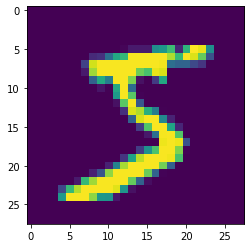

In [70]:
print(y_train[0])

plt.imshow(x_train[0])

In [71]:
#Neural network with single dense hidden layer

model = Sequential(name="singleHiddenLayerSGD")
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=SGD(), metrics=['acc'])



#model.compile(loss=categorical_crossentropy,optimizer=Adadelta())


In [72]:
history1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 1.1711 - acc: 0.7250 - val_loss: 0.6436 - val_acc: 0.8556
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.5519 - acc: 0.8644 - val_loss: 0.4568 - val_acc: 0.8854

In [73]:
model.summary()

# Flatten: (28,28) image to 784 dimensional vector
# First dense layer: input 784 dim-vector: w_{ij}x_j+b_i (i=1,...,128 size of our dense layer)
# Non-linearity on this output is ReLU y_i=relu(w_{ij}x_j+b_i)
# Second dense layer: input 128 dimensional vector y_i and calculate 10 dimensional output
# as follows z_k=softmax(v_{ki}y_i+b_k)

# initialisation of these parameters: out of the box initialisation

Model: "singleHiddenLayerSGD"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_65 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [74]:
print(np.shape(x_train[0]))
128*10+10

(28, 28)


1290

313/313 [==============================] - 0s 582us/step - loss: 0.2713 - acc: 0.9247
Test loss: 0.27126097679138184
Test accuracy: 0.9247000217437744


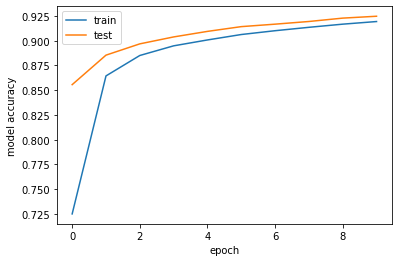

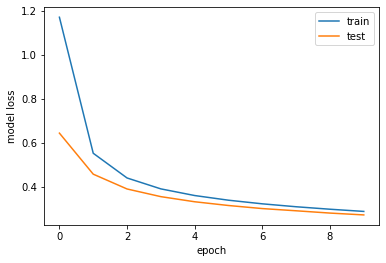

In [75]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=1)
#print("score", score)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#print("history acc", history1.history['acc'])
#print("history val_acc", history1.history['val_acc'])

# look into training history

# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [76]:
model = Sequential(name="singleHiddenLayerAdam")
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['acc'])

history2=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3647 - acc: 0.8986 - val_loss: 0.1960 - val_acc: 0.9425
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1668 - acc: 0.9526 - val_loss: 0.1384 - val

In [77]:
# our old example: linear regression
model = Sequential()
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#model.compile(loss=categorical_crossentropy,optimizer=SGD(), metrics=['accuracy'])

model.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['acc'])

history3=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
365/469 [======================>.......] - ETA: 0s - loss: 0.7569 - acc: 0.8147

KeyboardInterrupt: 

In [ ]:
# evaluate model
#score = model.evaluate(x_test, y_test, verbose=1)

# print performance
#print()
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
#plt.plot(history1.history['acc'])
#plt.plot(history1.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train (LR)', 'test (LR)','train (Dense,Adam)', 'test (Dense, Adam)','train (Dense,SGD)', 'test (Dense, SGD)'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train (LR)', 'test (LR)','train (Dense,Adam)', 'test (Dense, Adam)','train (Dense,SGD)', 'test (Dense, SGD)'], loc='best')
plt.show()

In [ ]:
model = Sequential(name="sequential")
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

#model.compile(loss=categorical_crossentropy,optimizer=SGD(), metrics=['accuracy'])

model.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])

history4=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
model.summary()

In [ ]:
# Alternative to Sequential model:

input_network = Input(shape=(28,28))
x1 = Flatten()(input_network)
x = Dense(200, activation='relu')(x1)
x = Dense(198, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

model= Model(input_network,outputs=output, name="inputOutput")
#opt = Adam(lr=0.0001)
model.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])
model.summary()

In [ ]:
history5=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Model: "inputOutput"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 10, 10)]          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 100)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 512)               51712     
_________________________________________________________________
dense_87 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_88 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_89 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_90 (Dense)             (None, 512)               